## Implementation of Random Forest Algorithm

Step 1: Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

Step 2: Load and Explore the Dataset

In [2]:
# Load the Breast Cancer dataset
data = load_breast_cancer()

# Features (X) and Labels (Y)
X = data.data  # Feature matrix
y = data.target  # Labels (malignant or benign)

# Print dataset details
print("Features:\n", data.feature_names)
print("Labels:\n", data.target_names)

# Convert to DataFrame for better visualization
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y
print(df.head())

Features:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:
 ['malignant' 'benign']
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29        

Step 3: Split the Data into Training and Testing Sets

In [3]:
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (455, 30)
Testing set size: (114, 30)


Step 4: Train the Random Forest Model

In [4]:
# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

print("Random Forest training complete!")

Random Forest training complete!


Step 5: Predict Using the Model

In [5]:
# Predict on the test set
y_pred = rf_clf.predict(X_test)

print("Predicted labels:\n", y_pred)
print("Actual labels:\n", y_test)

Predicted labels:
 [1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]
Actual labels:
 [1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]


Step 6: Evaluate the Model

In [6]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
report = classification_report(y_test, y_pred, target_names=data.target_names)
print("Classification Report:\n", report)

Accuracy: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

   malignant       0.98      0.93      0.95        43
      benign       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Step 7: Feature Importance (Optional)

In [7]:
# Check feature importance
importances = rf_clf.feature_importances_
for feature, importance in zip(data.feature_names, importances):
    print(f"{feature}: {importance:.4f}")

mean radius: 0.0487
mean texture: 0.0136
mean perimeter: 0.0533
mean area: 0.0476
mean smoothness: 0.0073
mean compactness: 0.0139
mean concavity: 0.0680
mean concave points: 0.1062
mean symmetry: 0.0038
mean fractal dimension: 0.0039
radius error: 0.0201
texture error: 0.0047
perimeter error: 0.0113
area error: 0.0224
smoothness error: 0.0043
compactness error: 0.0053
concavity error: 0.0094
concave points error: 0.0035
symmetry error: 0.0040
fractal dimension error: 0.0053
worst radius: 0.0780
worst texture: 0.0217
worst perimeter: 0.0671
worst area: 0.1539
worst smoothness: 0.0106
worst compactness: 0.0203
worst concavity: 0.0318
worst concave points: 0.1447
worst symmetry: 0.0101
worst fractal dimension: 0.0052


Step 8: Visualize Feature Importance (Optional)

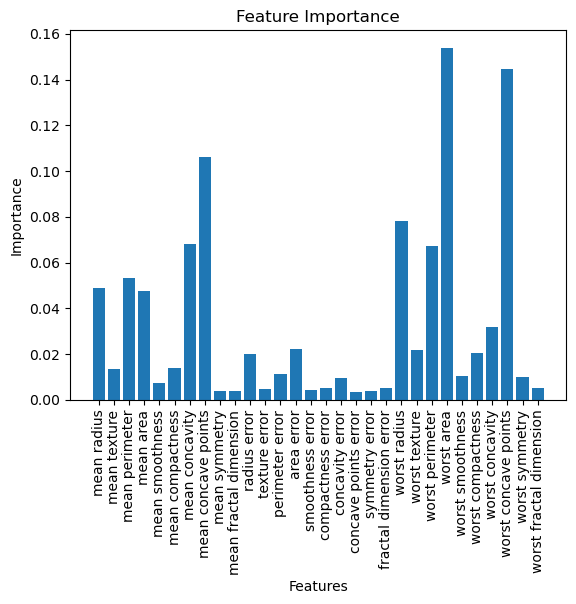

In [8]:
import matplotlib.pyplot as plt

# Plot feature importance
plt.bar(data.feature_names, importances)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()